## 이상치Outlier
+ 정상적이라고 생각되는 데이터의 범위 밖에 위치하는 값들을 의미

+ 잘못 입력하거나, 정상이지만, 상황에 따라 큰 값이 입력되는 경우에 주로 발생


+ 이것을 이용해서 제조공정상의 불량품 검출 또는 금융거래상에서 비정상 거래 탐지, 게임등에서 비정상 활동을 탐지할때 주로 사용함

+ 특이값은 전체 데이터의 평균을 끌어 올리거나 낮추는등 왜곡을 가져오므로 분석시 제거하는 것이 좋음
+ 이상치 판단 기준은 3사분위에서 + 1.5IQR 초과, 1사분위에서 - 1.5IQR 미만 

### 상자수염 그래프 (box-and-whisker plot)

+ 데이터의 대략적인 분포와 개별적인 이상치들을 동시에 보여줄 수 있으며 서로 다른 데이터 뭉치를 쉽게 비교할 수 있도록 도와주는 시각화 기법

+ 통계학자 존 튜키(John Tukey)가 1977년 저서 "탐색적 데이터 분석(Exploratory Data Analysis)"에서 처음 제시

+ 범위 막대에서는 수염의 양 끝이 최대값과 최소값을 나타내고, 상자는 사분위수범위를 나타내며, 상자 안에 중앙값을 표현하는 방식으로 "5가지 요약 수치" 를 표현

### 미국 50개 주 통계자료 중 주별 수입 분석

In [58]:
head(state.x77)

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766


In [59]:
state77 <- data.frame(state.x77)

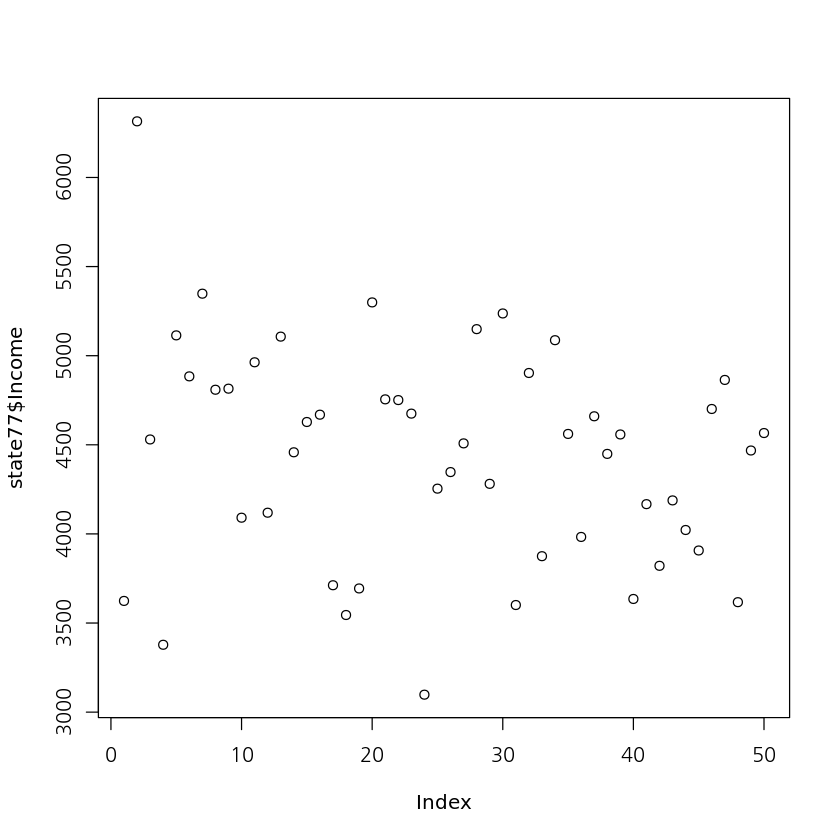

In [60]:
plot(state77$Income)

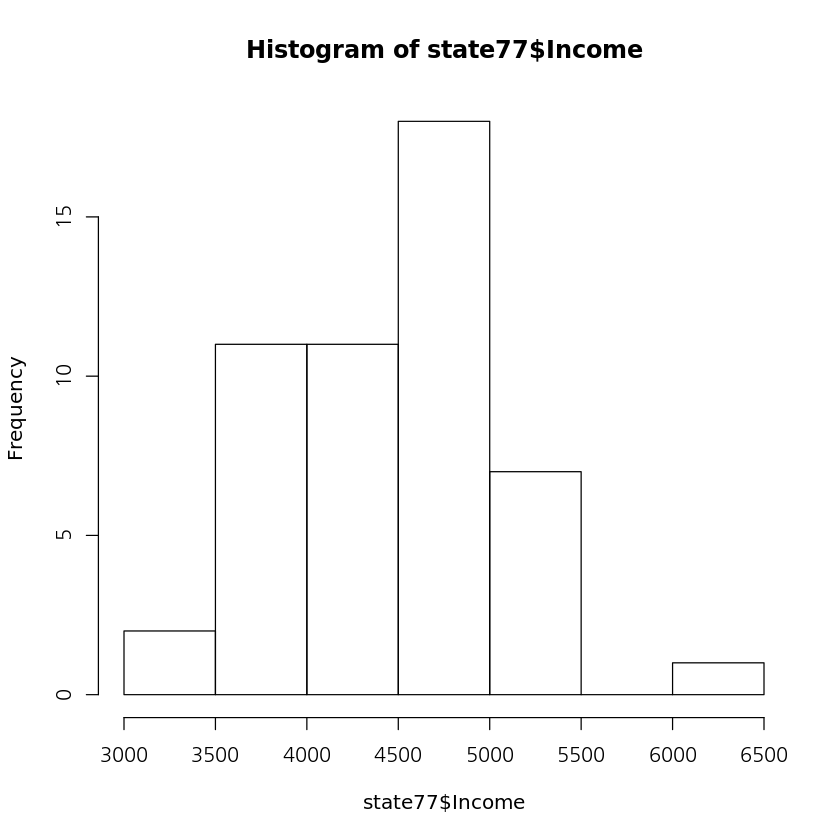

In [17]:
hist(state77$Income)

### 주별 수입 6000~6500 데이터(이상치) 존재여부 확인

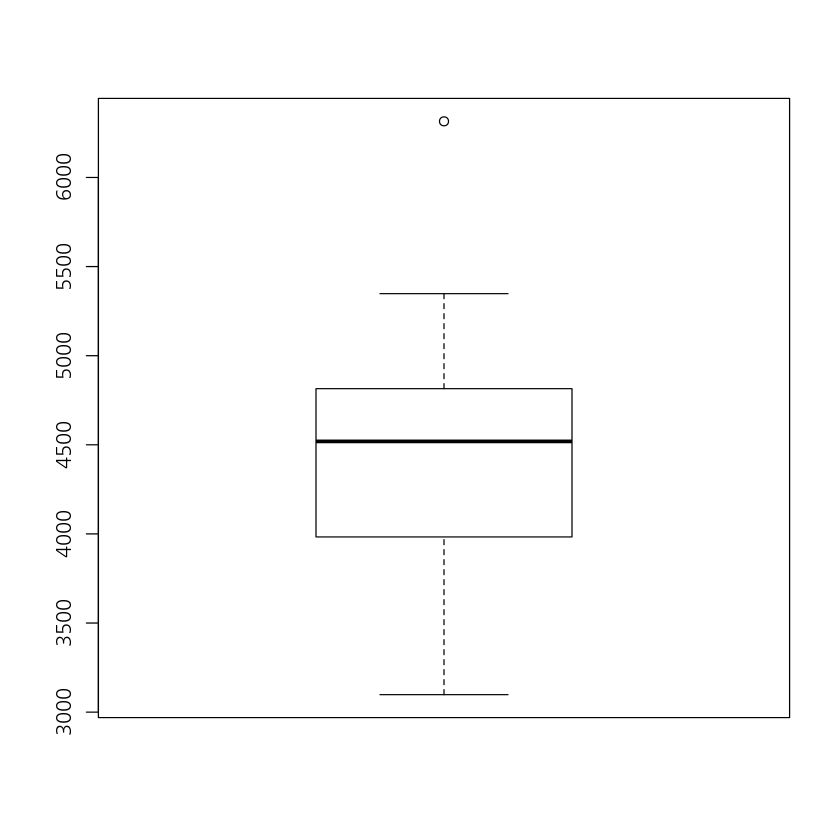

In [21]:
sbp <- boxplot(state77$Income)

### 이상치 확인
+ stats : 5가지 요약수
+ out : 이상치

In [22]:
sbp

3098
3983
4519
4815
5348
4333.093
4704.907


In [61]:
sbp$out

[1] 6315

In [62]:
state77[state77$Income == 6315, ]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432


### 이상치 제거 - 해당 컬럼의 값을 NA로 바꾸고 na.omit 사용

In [64]:
s77Income <- state77$Income

In [74]:
s77Income[s77Income == sbp$out] <- NA

In [75]:
s77Income

[1] 3624   NA 4530 3378 5114 4884 5348 4809 4815 4091 4963 4119 5107 4458 4628
[16] 4669 3712 3545 3694 5299 4755 4751 4675 3098 4254 4347 4508 5149 4281 5237
[31] 3601 4903 3875 5087 4561 3983 4660 4449 4558 3635 4167 3821 4188 4022 3907
[46] 4701 4864 3617 4468 4566

In [76]:
na.omit(s77Income)

[1] 3624 4530 3378 5114 4884 5348 4809 4815 4091 4963 4119 5107 4458 4628 4669
[16] 3712 3545 3694 5299 4755 4751 4675 3098 4254 4347 4508 5149 4281 5237 3601
[31] 4903 3875 5087 4561 3983 4660 4449 4558 3635 4167 3821 4188 4022 3907 4701
[46] 4864 3617 4468 4566
attr(,"na.action")
[1] 2
attr(,"class")
[1] "omit"

In [77]:
s77Income <- na.omit(s77Income)

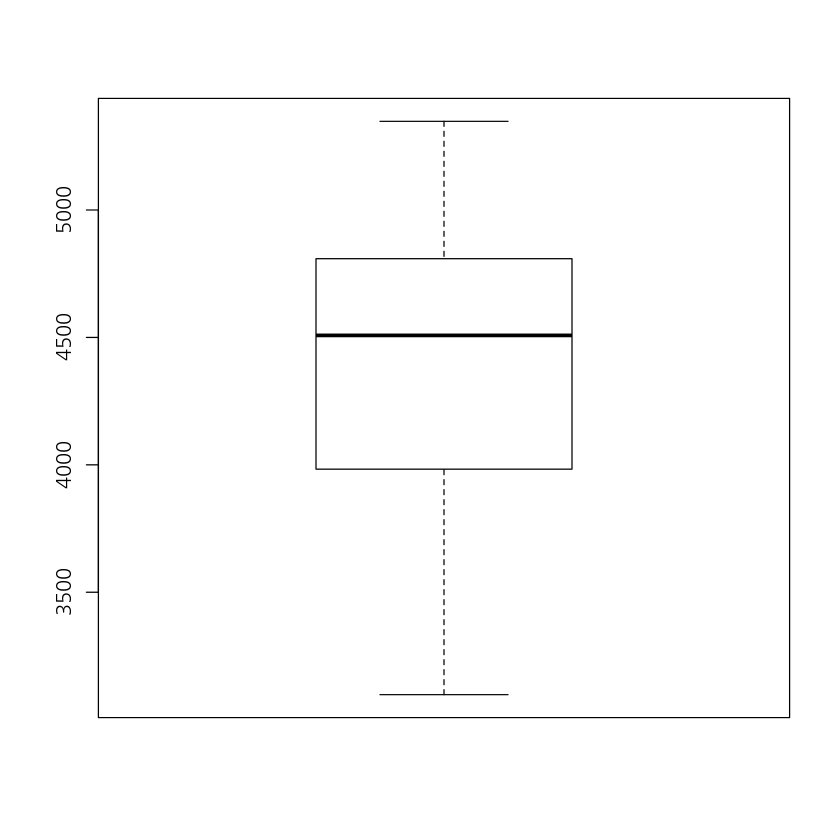

In [78]:
boxplot(s77Income)

### titanic 데이터 이상치 처리

In [95]:
load('titanic.rdata')

In [97]:
titanic <-data.frame('titanic.rdata')

In [99]:
str(titanic)

'data.frame':	1 obs. of  1 variable:
 $ X.titanic.rdata.: Factor w/ 1 level "titanic.rdata": 1


In [100]:
summary(titanic)

      X.titanic.rdata.
 titanic.rdata:1      

In [85]:
boxplot(titanic$fare)

ERROR: Error in boxplot(titanic$fare): 객체 'titanic'를 찾을 수 없습니다


In [ ]:
tbp$stats

In [ ]:
이상치 제거전, 제거후 평균 지불금액